# PCA for dimensionality reduction in `sklearn`

In the lecture we covered the theory behind one of the main dimensionality reduction techniques: Principal Component Analysis. In this notebook we go through how to implement it in Python using `sklearn`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris

sns.set_theme()

## Loading up the data and exploring it

One classical example is the iris dataset. We will perform dimensionality reduction on it. Let's first load it and put it in a DataFrame.

In [2]:
# Loading the iris dataset.
iris_dataset = load_iris()

print(type(iris_dataset))
print(iris_dataset.keys())
print(iris_dataset["data"].shape)
print(iris_dataset["feature_names"])
print(iris_dataset["target"])
print(iris_dataset["target_names"])

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


This dataset contains 150 rows with descriptions of flowers, categorized among three different types. It is usually used as a first example for classification tasks, but we will use it today for showcasing several clustering algorithms, and for clustering later on.

We can create a pandas DataFrame before using `sns.pairplot`.

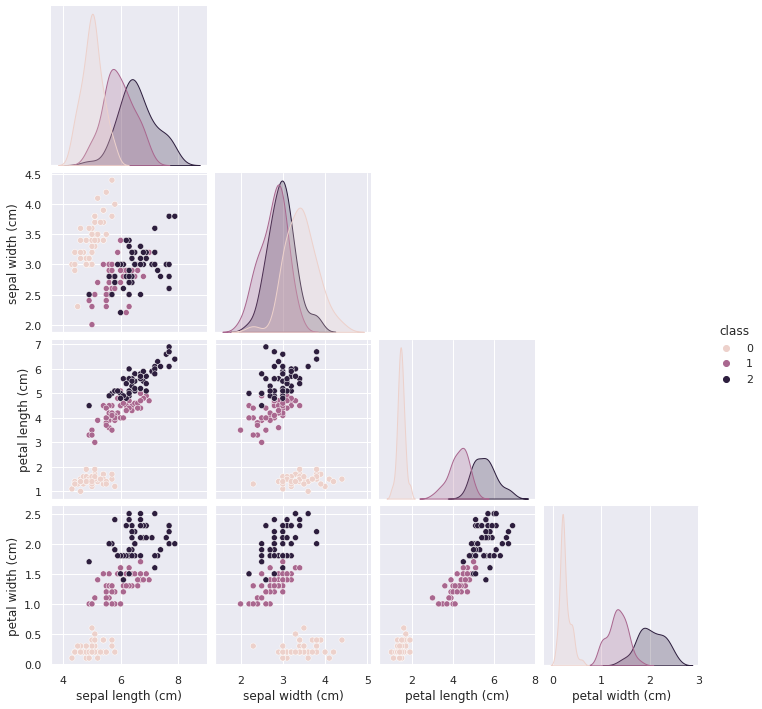

In [3]:
df = pd.DataFrame(
    data=iris_dataset["data"],
    columns=iris_dataset["feature_names"]
)

df["class"] = iris_dataset["target"]

sns.pairplot(data=df, hue="class", corner=True)

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Understanding the principal components

### Fitting the PCA

We can perform PCA automatically using the `PCA` object from `sklearn.decomposition`. Let's first preprocess the data using a standard scaler.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(iris_dataset["data"])

pca = PCA()
pca.fit(X)

After fitting, we can access many the things we discussed in class: the principal components, the variance explained by them...

In [ ]:
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]
[2.93808505 0.9201649  0.14774182 0.02085386]
[0.72962445 0.22850762 0.03668922 0.00517871]


As we discussed, these principal components are the orthogonal directions in $\mathbb{R}^4$ that maximize variance in the data, ordered by the amount of variance they explain.

### Projecting to two dimensions

These are two line plots we usually get for the principal components:

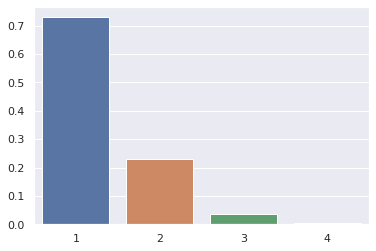

In [ ]:
sns.barplot(x=[1, 2, 3, 4], y=pca.explained_variance_ratio_)

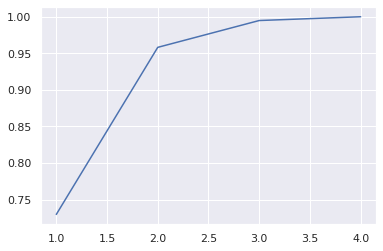

In [ ]:
sns.lineplot(x=[1,2,3,4], y=np.cumsum(pca.explained_variance_ratio_))

**There is no golden rule for selecting the number of principal components to project to.** Let's go with two, that already explain a little bit over 95% of the variance.

One way of finding the low dimensional representation of the data `z` is to fit another `PCA` object, and passing `n_components=2` as its flag.

In [ ]:
pca_2 = PCA(n_components=2)
z = pca_2.fit_transform(X)

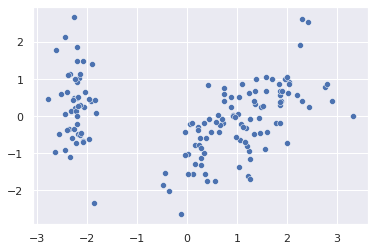

In [ ]:
sns.scatterplot(x=z[:, 0], y=z[:, 1])

Are these principal components representative of the classes in the data? Are the classes being separated? We can check by illuminating with the actual class:

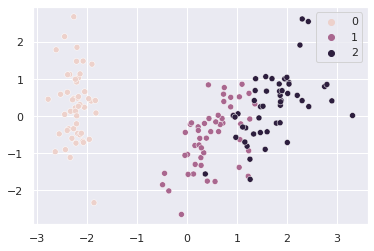

In [ ]:
sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=iris_dataset.target)

## Using other dimensionality reduction algorithms out-of-the-box

One great thing about how `sklearn` is implemented is that we can use *almost* the same code to get low dimensional embeddings for multiple algorithms. Let me show you how to do it for, for example, t-SNE and Isomap:

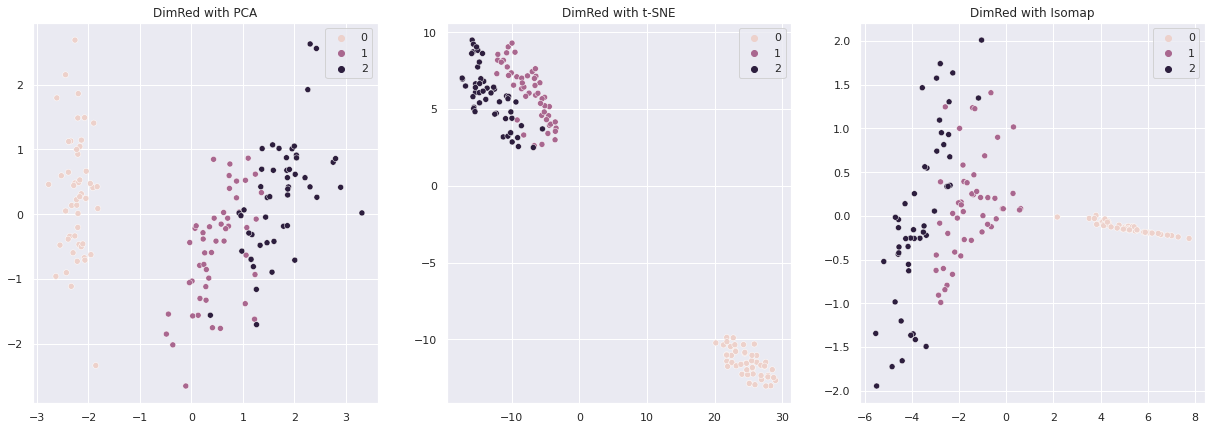

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, Isomap

tsne = TSNE(n_components=2)
isomap = Isomap(n_components=2)

z_tsne = tsne.fit_transform(X)
z_isomap = isomap.fit_transform(X)

_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*7, 1*7))

ax1.set_title("DimRed with PCA")
ax2.set_title("DimRed with t-SNE")
ax3.set_title("DimRed with Isomap")

sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=iris_dataset["target"], ax=ax1)
sns.scatterplot(x=z_tsne[:, 0], y=z_tsne[:, 1], hue=iris_dataset["target"], ax=ax2)
sns.scatterplot(x=z_isomap[:, 0], y=z_isomap[:, 1], hue=iris_dataset["target"], ax=ax3)